In [4]:
!pip install mtcnn keras-facenet opencv-python numpy


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10387 sha256=363de8e3cab6d9ec410bdb588e0136ca75488cea8659ffed60f5a8cc9f108f6d
  Stored in directory: c:\users\govin\appdata\local\pip\cache\wheels\05\b0\f5\19ac49fedc10b1df3ee56b096edbcfa39d45794fccc6bcdbbf
Successfully built keras-facenet


In [8]:
import cv2
import numpy as np
from mtcnn import MTCNN
from keras_facenet import FaceNet
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [10]:
# Initialize MTCNN detector for face detection
detector = MTCNN()

# Initialize FaceNet model for extracting face embeddings
embedder = FaceNet()

In [11]:
def detect_and_crop_faces(image):
    # Detect faces in the image using MTCNN
    faces = detector.detect_faces(image)
    
    # Crop detected faces
    cropped_faces = []
    for face in faces:
        x, y, width, height = face['box']
        cropped_face = image[y:y+height, x:x+width]  # Crop face from image
        cropped_faces.append(cropped_face)
    
    return cropped_faces, faces


In [12]:
def get_embeddings(faces):
    # Extract 128-d embeddings for each detected face using FaceNet
    embeddings = embedder.embeddings(faces)
    return embeddings


In [16]:
def is_match(known_embedding, candidate_embedding, threshold=0.5):
    # Compute cosine similarity between known and candidate face embeddings
    similarity = cosine_similarity([known_embedding], [candidate_embedding])
    return similarity[0][0] > threshold


In [18]:
def load_image(image_path):
    # Load an image from file and convert to RGB
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_image

# Display an image using Matplotlib
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()


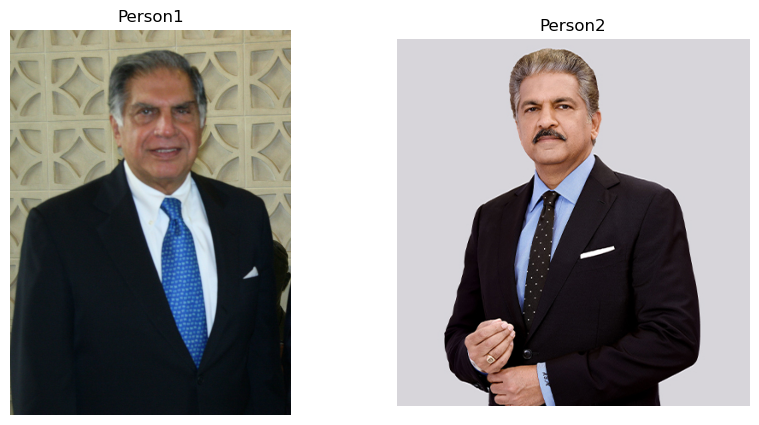

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


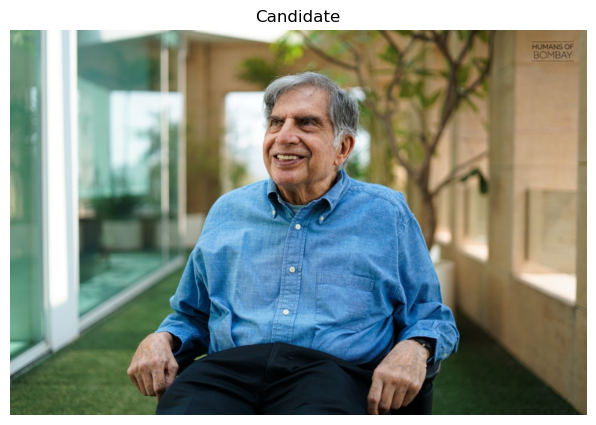

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
Match found: Person1 with confidence: 0.87


In [43]:
import matplotlib.pyplot as plt

# Function to display images in a grid
def display_images(images, titles=None):
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image)
        plt.axis('off')
        if titles:
            plt.title(titles[i])
    plt.show()

# Function to compute the confidence (cosine similarity)
def compute_similarity(known_embedding, candidate_embedding):
    similarity = cosine_similarity([known_embedding], [candidate_embedding])
    return similarity[0][0]

# Function to check if embeddings match with a given threshold and return the confidence
def is_match_with_confidence(known_embedding, candidate_embedding, threshold=0.5):
    similarity = compute_similarity(known_embedding, candidate_embedding)
    return similarity > threshold, similarity

# Load and display known faces
known_faces = {
    "Person1": load_image(r"C:\Users\govin\Downloads\Ratan Tata.jpg"),
    "Person2": load_image(r"C:\Users\govin\Downloads\Anand Mahindra.jpg"),
}

# Display the known faces (Person1 and Person2)
known_faces_images = list(known_faces.values())
known_faces_names = list(known_faces.keys())

display_images(known_faces_images, known_faces_names)

# Detect and extract embeddings for known faces
known_embeddings = {}
for name, image in known_faces.items():
    faces, _ = detect_and_crop_faces(image)
    if faces:
        known_embeddings[name] = get_embeddings([faces[0]])[0]  # Use the first detected face

# Load the candidate image to recognize
candidate_image = load_image(r"C:\Users\govin\Downloads\ratan1.jpeg")

# Display the candidate image
display_images([candidate_image], ["Candidate"])

# Detect and extract embedding for the candidate face
detected_faces, detected_boxes = detect_and_crop_faces(candidate_image)

# If a face is detected in the candidate image
if detected_faces:
    candidate_embedding = get_embeddings([detected_faces[0]])[0]  # Use the first detected face

    # Compare the candidate embedding with known embeddings
    match_found = False
    for name, known_embedding in known_embeddings.items():
        match, confidence = is_match_with_confidence(known_embedding, candidate_embedding)
        if match:
            print(f"Match found: {name} with confidence: {confidence:.2f}")
            match_found = True
            break
    
    if not match_found:
        print("No match found.")
else:
    print("No faces detected.")


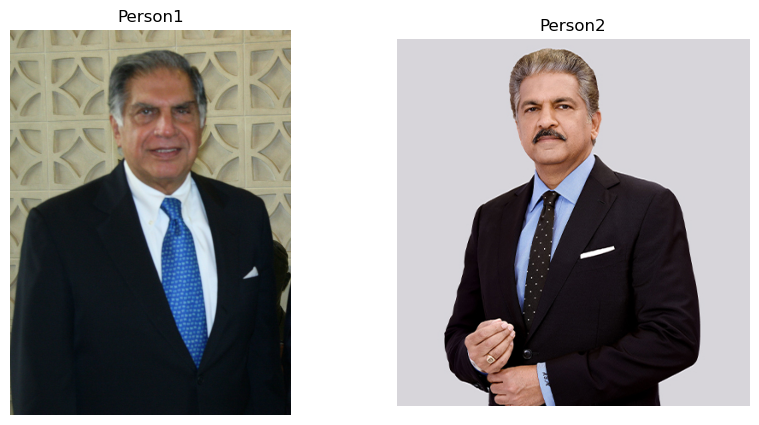

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


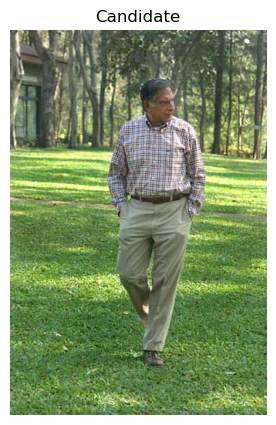

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Match found: Person1 with confidence: 0.69


In [45]:
import matplotlib.pyplot as plt

# Function to display images in a grid
def display_images(images, titles=None):
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image)
        plt.axis('off')
        if titles:
            plt.title(titles[i])
    plt.show()

# Function to compute the confidence (cosine similarity)
def compute_similarity(known_embedding, candidate_embedding):
    similarity = cosine_similarity([known_embedding], [candidate_embedding])
    return similarity[0][0]

# Function to check if embeddings match with a given threshold and return the confidence
def is_match_with_confidence(known_embedding, candidate_embedding, threshold=0.5):
    similarity = compute_similarity(known_embedding, candidate_embedding)
    return similarity > threshold, similarity

# Load and display known faces
known_faces = {
    "Person1": load_image(r"C:\Users\govin\Downloads\Ratan Tata.jpg"),
    "Person2": load_image(r"C:\Users\govin\Downloads\Anand Mahindra.jpg"),
}

# Display the known faces (Person1 and Person2)
known_faces_images = list(known_faces.values())
known_faces_names = list(known_faces.keys())

display_images(known_faces_images, known_faces_names)

# Detect and extract embeddings for known faces
known_embeddings = {}
for name, image in known_faces.items():
    faces, _ = detect_and_crop_faces(image)
    if faces:
        known_embeddings[name] = get_embeddings([faces[0]])[0]  # Use the first detected face

# Load the candidate image to recognize
candidate_image = load_image(r"C:\Users\govin\Downloads\4256577853_0479b0228a.jpg")

# Display the candidate image
display_images([candidate_image], ["Candidate"])

# Detect and extract embedding for the candidate face
detected_faces, detected_boxes = detect_and_crop_faces(candidate_image)

# If a face is detected in the candidate image
if detected_faces:
    candidate_embedding = get_embeddings([detected_faces[0]])[0]  # Use the first detected face

    # Compare the candidate embedding with known embeddings
    match_found = False
    for name, known_embedding in known_embeddings.items():
        match, confidence = is_match_with_confidence(known_embedding, candidate_embedding)
        if match:
            print(f"Match found: {name} with confidence: {confidence:.2f}")
            match_found = True
            break
    
    if not match_found:
        print("No match found.")
else:
    print("No faces detected.")
